<h1 style="
    color: white; 
    background-color: #ff4081; 
    font-family: Arial, sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #ff1744;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
📌 Importing Libraries
</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

<h1 style="
    color: white; 
    background-color: #3f51b5; 
    font-family: 'Trebuchet MS', sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #1a237e;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
📂 Loading Dataset
</h1>


In [3]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h1 style="
    color: black; 
    background-color: #ffeb3b; 
    font-family: Verdana, sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #fbc02d;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
🔍 Understanding Data
</h1>


In [7]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
df.select_dtypes(exclude=object).skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

C:\Users\rubha\AppData\Local\Temp\ipykernel_30164\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

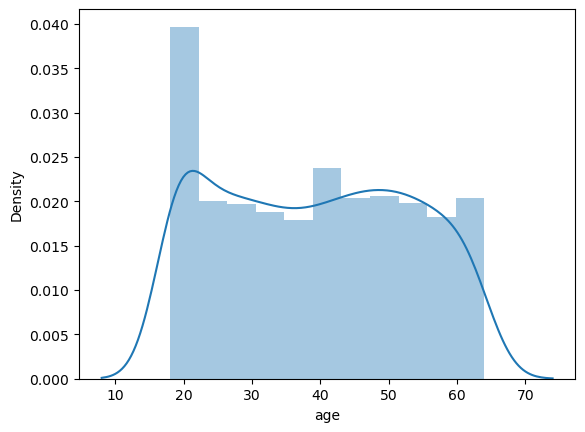

In [23]:
sns.distplot(df['age'])

C:\Users\rubha\AppData\Local\Temp\ipykernel_30164\4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

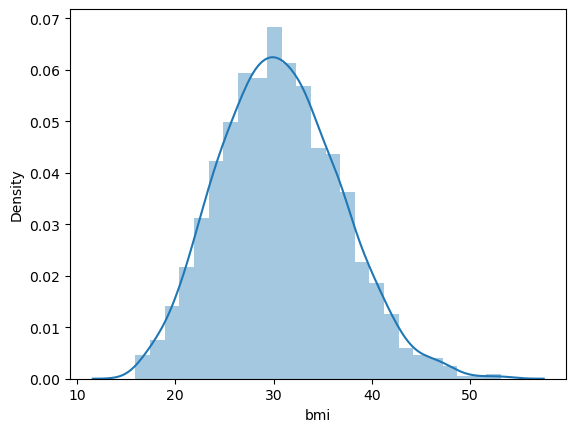

In [27]:
sns.distplot(df['bmi'])

C:\Users\rubha\AppData\Local\Temp\ipykernel_30164\1319113370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

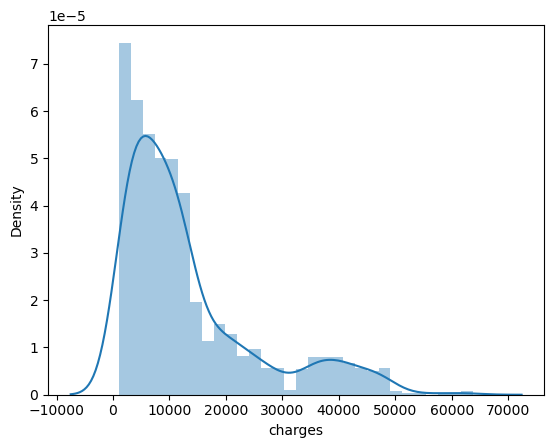

In [33]:
sns.distplot(df['charges'])

<Axes: xlabel='sex', ylabel='count'>

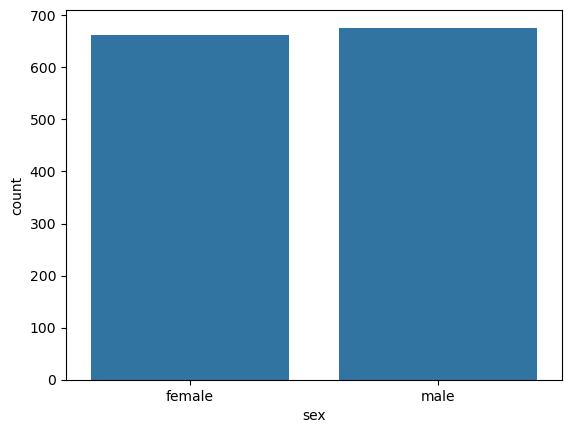

In [35]:
sns.countplot(x='sex',data=df)

In [37]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='count'>

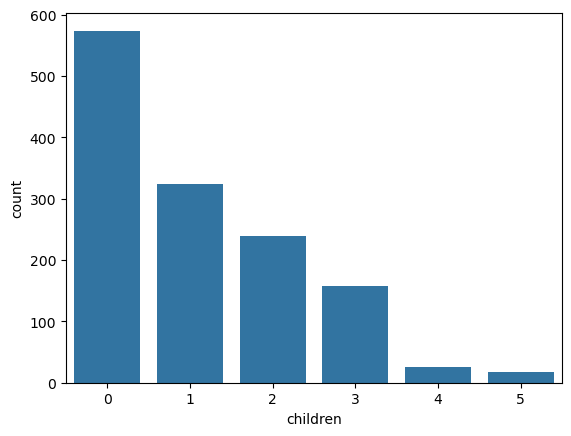

In [39]:
sns.countplot(x='children', data=df)

In [45]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

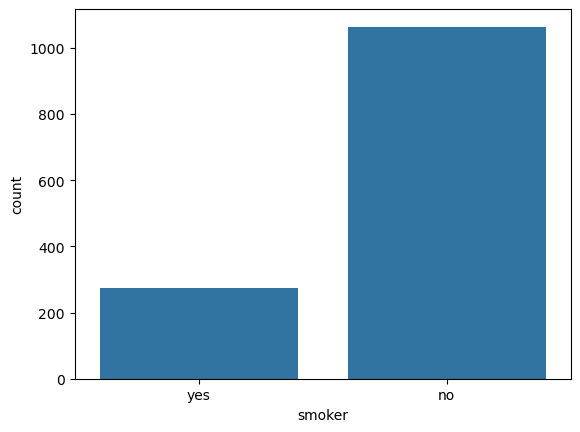

In [41]:
sns.countplot(x='smoker', data=df)

In [47]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

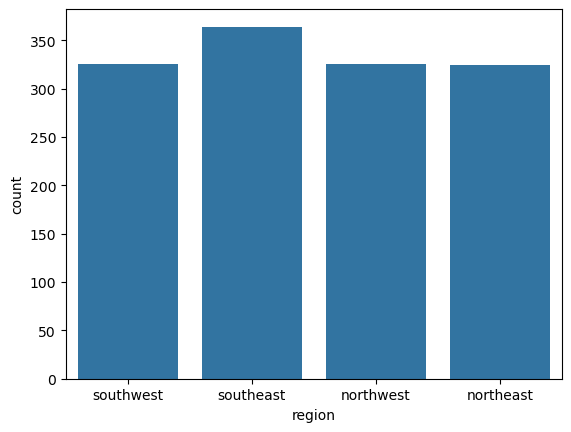

In [43]:
sns.countplot(x='region', data=df)

In [49]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [51]:
encoder = LabelEncoder()

In [53]:
cat_col = [col for col in df.columns if df[col].dtype == 'O']
cat_col

['sex', 'smoker', 'region']

In [55]:
for i in cat_col:
    df[i] = encoder.fit_transform(df[i])

In [57]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [61]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

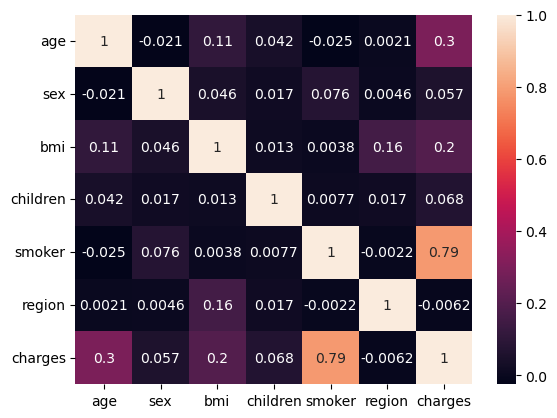

In [63]:
sns.heatmap(df.corr(),annot=True)

<h1 style="
    color: white; 
    background-color: #673ab7; 
    font-family: Georgia, serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #4527a0;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
📊 Splitting DataSet
</h1>


In [67]:
X = df.drop(columns='charges', axis=1)
y = df['charges']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

<h1 style="
    color: white; 
    background-color: #4caf50; 
    font-family: 'Courier New', monospace; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #2e7d32;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
🚀 Model Training
</h1>


In [77]:
lr = LinearRegression()
rfr=RandomForestRegressor(n_estimators=60, random_state=2)
ab=AdaBoostRegressor(n_estimators=80, random_state=2)
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor(max_depth=7)
xg=XGBRegressor(n_estimators=12,random_state=23)

In [79]:
clfs={
    "Linear":lr,
    "RandomForest":rfr,
    "AdaBoost":ab,
    "KNN":knn,
    "DT":dt,
    "XGB":xg  
}

<h1 style="
    color: black; 
    background-color: #ffc107; 
    font-family: Impact, sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #ff9800;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
📈 Model Evaluation & Results
</h1>


In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    prf=r2_score(y_test, y_pred)
    
    return prf

In [83]:
train_classifier(xg,X_train,y_train,X_test,y_test)

0.8556750882811

In [85]:
r2_scores = []
for name,clf in clfs.items():
    
    current_r2s = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_r2s)
    print("__"*20)
    
    
    r2_scores.append(current_r2s)
    

For  Linear
Accuracy -  0.7445422986536503
________________________________________
For  RandomForest
Accuracy -  0.8354919884283105
________________________________________
For  AdaBoost
Accuracy -  0.8172545663029499
________________________________________
For  KNN
Accuracy -  0.09216846615068808
________________________________________
For  DT
Accuracy -  0.7833856958629856
________________________________________
For  XGB
Accuracy -  0.8556750882811
________________________________________


<h1 style="
    color: white; 
    background-color: #009688; 
    font-family: 'Lucida Console', sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #00695c;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
📝 Final Thoughts & Conclusion
</h1>


In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'r2_score':r2_scores}).sort_values('r2_score',ascending=False)
performance_df

,Algorithm,r2_score
5,XGB,0.855675
1,RandomForest,0.835492
2,AdaBoost,0.817255
4,DT,0.783386
0,Linear,0.744542
3,KNN,0.092168
